<a href="https://colab.research.google.com/github/kylerhellyer/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/KHellyer_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def mean(nums):
  return sum(nums) / len(nums)

def variance(nums, sample=False):
  if sample:
    return sum((x - mean(nums)) ** 2 for x in nums) / (len(nums) - 1)
  else:
    return sum((x - mean(nums)) ** 2 for x in nums) / len(nums)

def stdev(nums):
  return (variance(nums))**.5 

print('\n Mean of Sales: \n',mean(sales), '\n Variance of Sales: \n',variance(sales, sample=True), '\n Standard deviation: \n',stdev(sales))


 Mean of Sales: 
 3052.714285714286 
 Variance of Sales: 
 214387.90476190473 
 Standard deviation: 
 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np 

entry = [127, 80, 105, 92, 120, 115, 93]
covar = np. cov(sales, entry,ddof=1)
print('Covariance is: \n',covar)

Covariance is: 
 [[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
stdentry = stdev(entry)
stdsale = stdev(sales)
#corrcoef is covariance(x,y)\ stdev(x,y)
dfactor = np.array([[stdsale **2, stdsale * stdentry],
                    [stdsale * stdentry, stdentry ** 2]])

corrcoef = np.divide(covar, dfactor)
print(corrcoef)
print(np.corrcoef(sales,entry));

[[1.16666667 1.12330631]
 [1.12330631 1.16666667]]
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd 
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
titancov = df.cov()
print('Var-Covar \n', titancov)
titancorr = df.corr()
print('\n Correlation \n',titancorr)

Var-Covar 
                      Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]

 Correlation 
                   Unnamed: 0    pclass  ...      body  has_cabin_number
Unnamed: 0          1.000000  0.897822  ...  0.015558         -0.603727
pclass

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

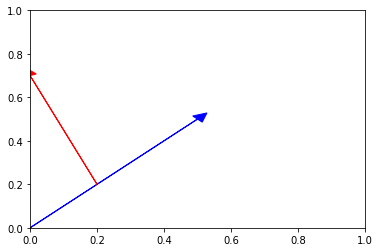

In [0]:
import matplotlib.pyplot as plt

plt.arrow(0,0,.5,.5, head_width= 0.04, head_length = 0.04, color= 'b')
plt.arrow(.2,.2,-.2,.5,head_width= 0.04, head_length = 0.04, color= 'r');

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
al= np.mat('-5;3;7')
bl= np.mat('6,-8,2')
ort = np.dot(bl,al)
print(ort,'Non Orthagonal. orthagonal vectors have a dot product of Zero') 

[[-40]] Non Orthagonal. orthagonal vectors have a dot product of Zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c= np.array([2,-15,6,20])
c2= (2**2)+(-15**2)+(6**2)+(20**2)
print(np.linalg.norm(c)**2)
cdc= np.dot(c,c)
print(cdc)
transc= c.T
print(np.matmul(transc,c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d=7[10]+12[01]=7i^+12j^

e=2i^⎡⎣⎢100⎤⎦⎥11j^⎡⎣⎢010⎤⎦⎥−8k^⎡⎣⎢001⎤⎦⎥=2i^+11j^+−8k^

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
def unitize(f):
  '''Takes an array(f) & returns the unit 
  vector format of the array'''
  normf = np.linalg.norm(f)
  unitize= (f / normf)
  print('Unit Vector:',unitize)
  
unitize(f)

Unit Vector: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

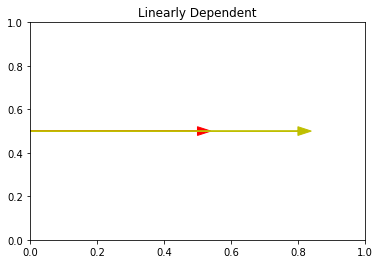

In [0]:
plt.arrow(0,0.5,.5,0, head_width= .04, head_length =.04, color= 'r')
plt.arrow(0,0.5,.8,0, head_width= .04, head_length =.04, color= 'y')
plt.title("Linearly Dependent");
  

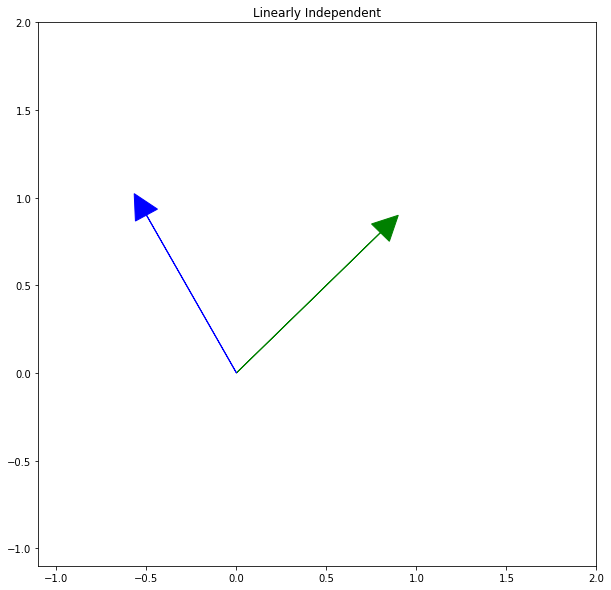

In [0]:
fig = plt.figure(figsize = (10,10))
plt.xlim(-1.1,2)          
plt.ylim(-1.1,2)

plt.arrow(0,0,.8,.8, head_width = .14 , head_length = .14, color = 'g')
plt.arrow(0,0,-.5,.9, head_width= .14 , head_length = .14, color = 'b')
plt.title('Linearly Independent');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

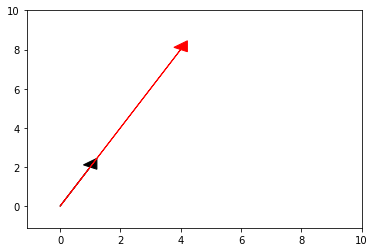

In [0]:
plt.xlim(-1.1,10)          
plt.ylim(-1.1,10)
plt. arrow(0,0,1,2, head_width = .5, head_length = .5, color= 'k')
plt. arrow(0,0,4,8, head_width = .5, head_length = .5, color= 'r');

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
span = np.array([[1,2,3],
                 [-1,0,7],
                 [4,8,2]])

np.linalg.matrix_rank(span)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



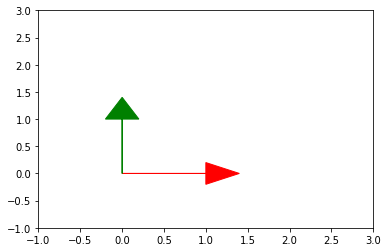

In [0]:
plt.ylim(-1,3)
plt.xlim(-1,3)
plt. arrow(0,0,1,0, head_width = 0.4, head_length = 0.4 , color = 'r')
plt.arrow(0,0,0,1, head_width = 0.4, head_length = 0.4 , color = 'g');

## 6.2 What does it mean to form a basis?

A basis consists of two or more vectors that are linarly independent and who have combinations span the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.mat('1,2,3 ;-1,0,7 ;4,8,2')
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

How many dimensions it'll span 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
import matplotlib.pyplot as plt 

[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


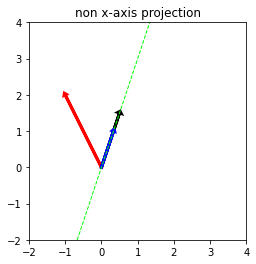

In [0]:
plt.xlim(-2,4)          
plt.ylim(-2,4)
v = [1/3,1] 
w = [-1,2]
numpy_v = np.array([1/3,1])
numpy_w = np.array([-1,2])
w_dot_v = np.dot(numpy_v, numpy_w)
v_dot_v = np.dot(numpy_v, numpy_v)
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)
# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.plot(x_vals, y_vals, '--', color='lime', linewidth=1)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.07, head_length=0.05, color ='red')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.1, head_length=0.05, color ='black')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.07, head_length=0.05, color ='blue')
#plt.arrow(projection[0],projection[1],-1.5,.55)
plt.title("non x-axis projection")
plt.show()

In [0]:
projection
v_dot_v
fraction

1.5

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

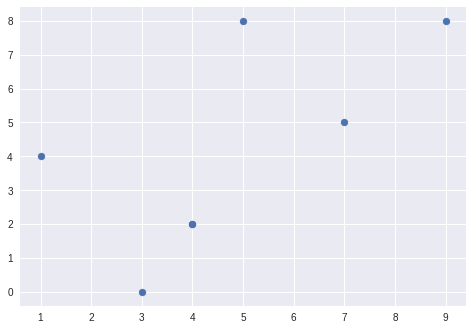

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()